In [1]:
import pickle
import plotly.graph_objects as go
from copy import copy, deepcopy
from pprint import pprint
from Geometry3D import Point, distance, HalfLine, Plane
import Geometry3D
import gcline
from importlib import reload

#import numpy as np
#suppress scientific notation
#np.set_printoptions(suppress=True, precision=8)
#import parsers.cura4
#from parsers import cura4

import threader, geometry_helpers, gcode, gcline, tlayer, util, cura4layer, lablogging, rich_output_handler, logger, plot_styles
from geometry_helpers import GPoint
from threader import Threader
from tlayer import TLayer
from util import find, GCodeException
from danutil import dupcount
import plot_helpers, plotting, plot_styles
from plotting import plot_steps
import geometry.utils

#Attempt to reload modules automatically
%load_ext autoreload
%autoreload 2

reload threader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#Fusion: smaller complex shape v1
gcode_file = '/Users/dan/r/thread_printer/stl/test2/Smaller complex shape - cura.gcode'
cura_project = '/Users/dan/r/thread_printer/stl/test2/Smaller complex shape - cura.3mf'
# From cura4.parse_3mf(cura_project) so I don't have to run that every time
thread_transform = np.array([39.26039839, 46.27034378, 23.87050056])
#See thread_from_fusion.py to get thread path
tpath = [
		([33.7300, 17.1077, 11.4653], [56.0477, 43.4545, 11.4653]),
		([56.0477, 43.4545, 11.4653], [53.2410, 59.2656, 11.4653]),
		([53.2410, 59.2656, 11.4653], [26.9901, 69.3288, 42.0560]),
		([26.9901, 69.3288, 42.0560], [26.9901, 69.3288, 47.7410]),
]

In [2]:
gcode_file = '/Users/dan/r/thread_printer/stl/test3/Router test-cura5.gcode'
cura_project = '/Users/dan/r/thread_printer/stl/test3/Router test-cura5.3mf'
#thread_transform = np.array([27.43560219, 27.43383789,  5.0])
tpath = [
	([18.2689, 14.9338, 3.3333], [18.2689, 36.6005, 3.3333]),
	([18.2689, 36.6005, 3.3333], [36.6023, 36.6005, 3.3333]),
	([36.6023, 36.6005, 3.3333], [36.6023, 18.2672, 3.3333]),
	([36.6023, 18.2672, 3.3333], [21.6023, 18.2672, 3.3333]),
	([21.6023, 18.2672, 3.3333], [21.6023, 21.6005, 6.6667]),
	([21.6023, 21.6005, 6.6667], [21.6023, 36.6005, 6.6667]),
	([21.6023, 36.6005, 6.6667], [33.2689, 36.6005, 6.6667]),
	([33.2689, 36.6005, 6.6667], [33.2689, 21.6005, 6.6667])
]

In [ ]:
thread_transform = cura4.parse_3mf(cura_project)
thread_transform

In [71]:
#tpath = np.array(tpath)

#Do it this way so I can add transform if needed
#tpath = np.insert(tpath, 0, [[0,0,0], tpath[0,0]], axis=0)

#Temporary fix for TODO in cura4.parse3mf
#thread_transform[2] = 0

g = gcode.GcodeFile(gcode_file, layer_class=TLayer)
t = Threader(g)

#start_layer = next(layer for layer in g.layers if (layer.z + layer.layer_height) >= tpath[0][1][2])
#start_layer = g.layers[56]

thread_geom = list([geometry_helpers.GSegment(GPoint(*s), GPoint(*e)) for s,e in tpath])

logger.restart_logging()
t.route_model(thread_geom, end_layer=17)

Accordion()

In [69]:
import more_itertools
thr = t.layer_steps[16].steps[4].printer.anchor_to_ring()
avoid = t.layer_steps[16].steps[5].debug_avoid
not thr.intersecting(avoid) and not any([geometry_helpers.too_close(thr, ep) for ep in (set(more_itertools.flatten(avoid)) - set(thr[:]))])

True

Preview of 15 steps for layer 16


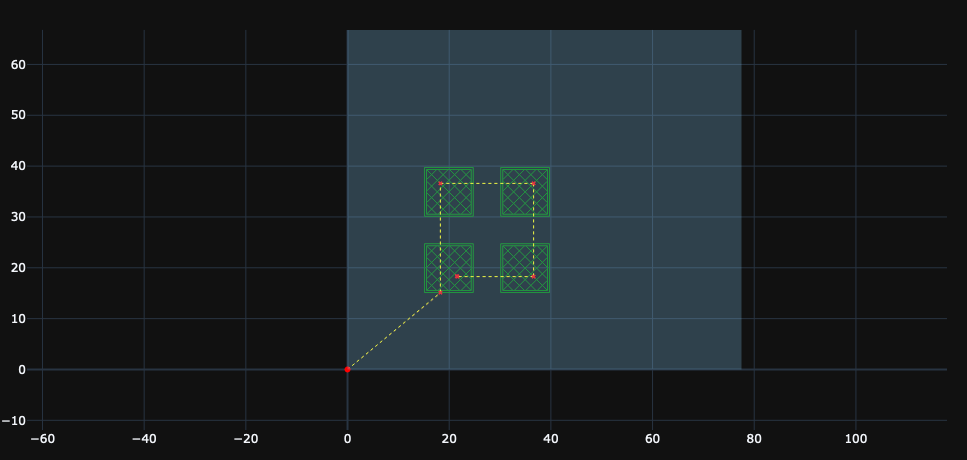

Step 0: Print 37 segments thread doesn't intersect


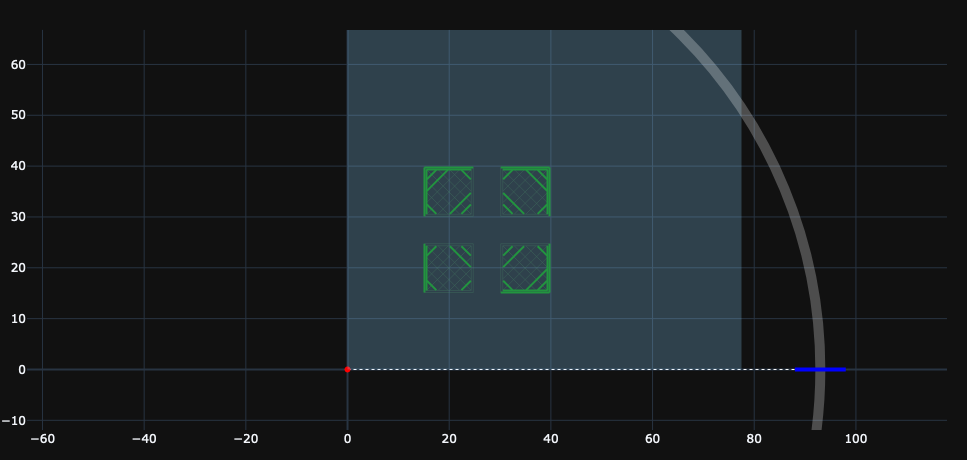

Step 1: Move thread to overlap anchor at { 18.27,  15.13,   3.40}


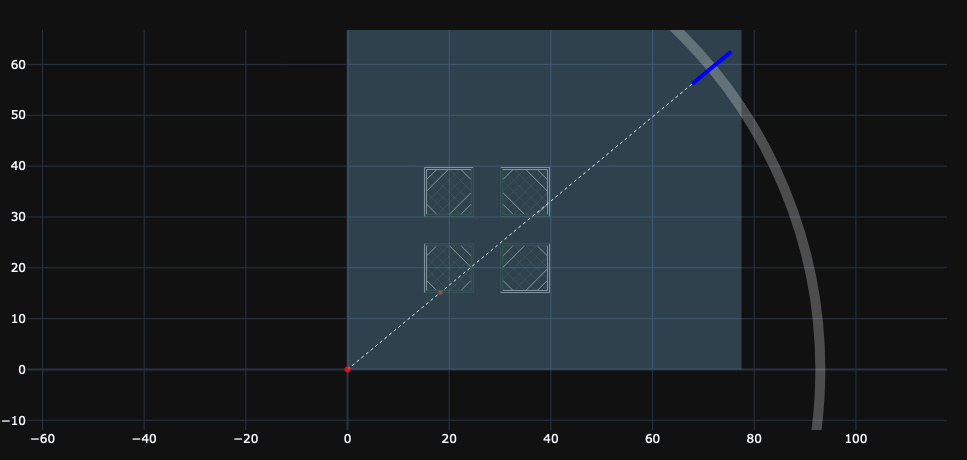

Step 2: Print 1 segment to fix anchor


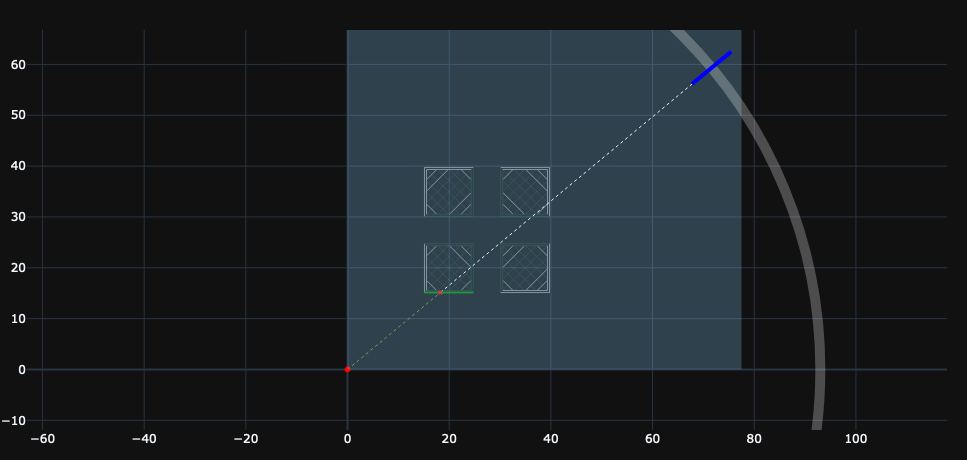

Step 3: Move thread to overlap anchor at { 18.27,  36.60,   3.40}


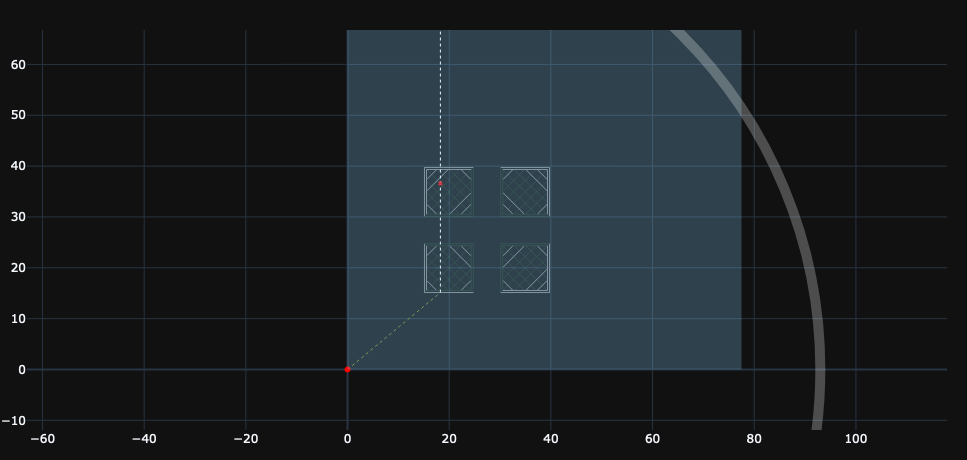

Step 4: Print 1 segment to fix anchor


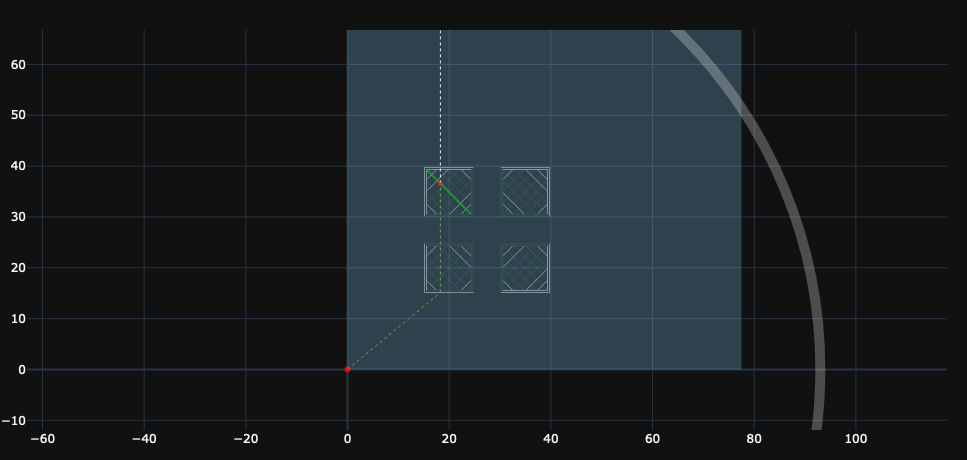

Step 5: Print 13 segments thread doesn't intersect


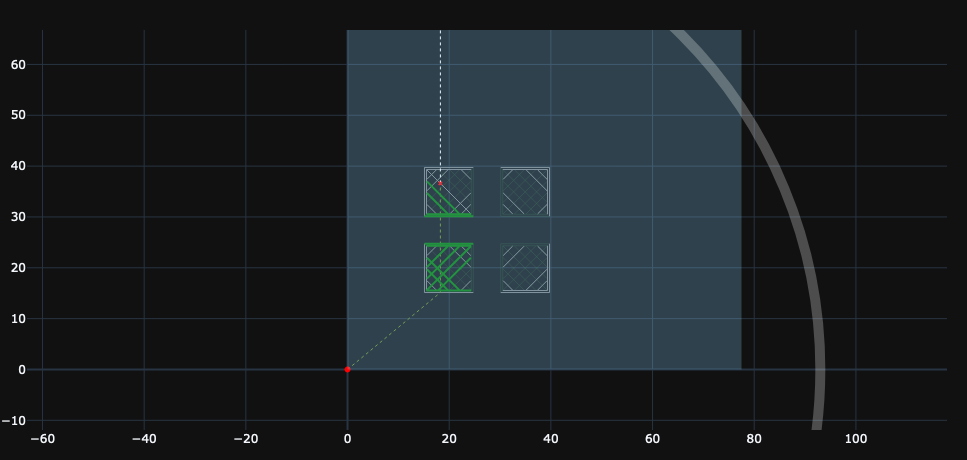

Step 6: Move thread to overlap anchor at { 36.60,  36.60,   3.40}


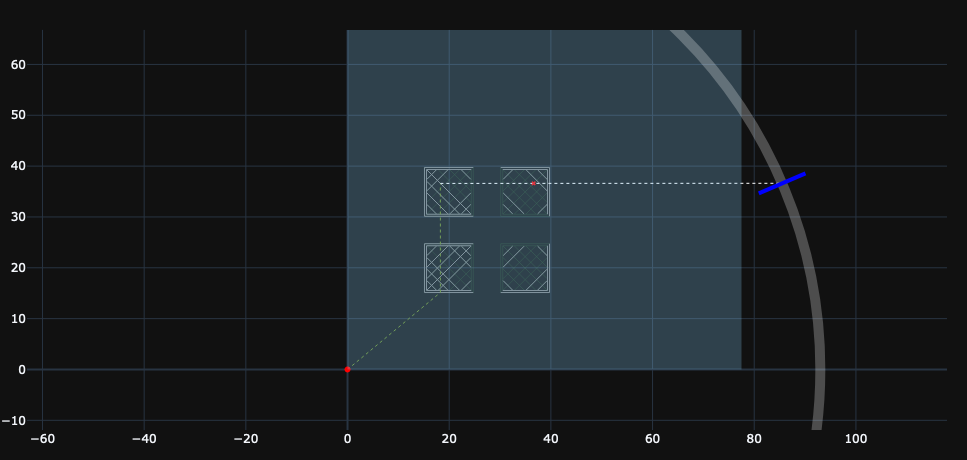

Step 7: Print 1 segment to fix anchor


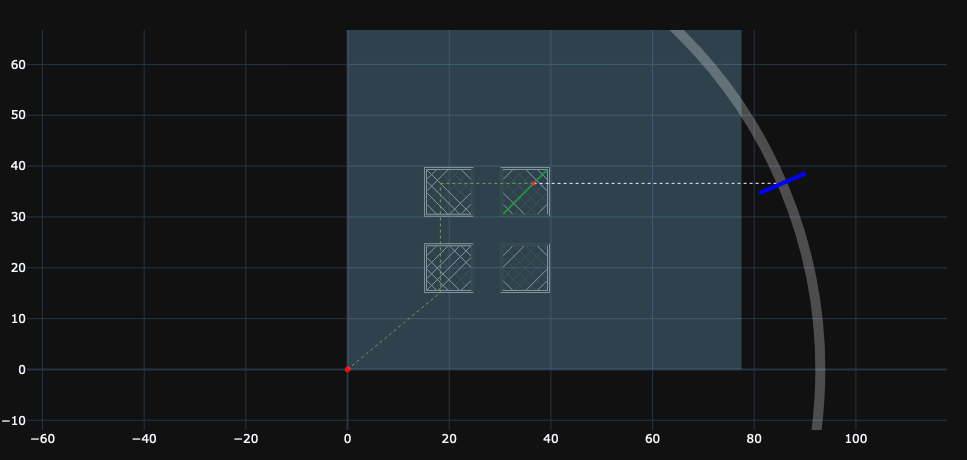

Step 8: Print 11 segments thread doesn't intersect


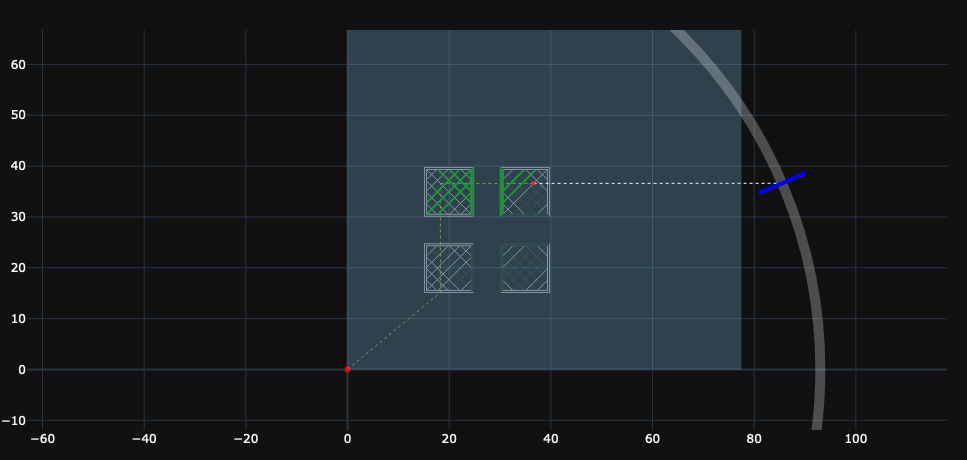

Step 9: Move thread to overlap anchor at { 36.60,  18.27,   3.40}


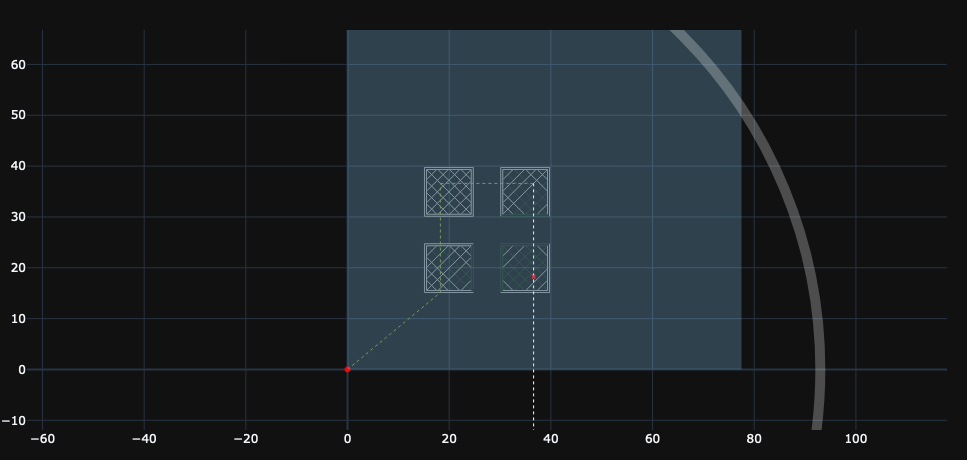

Step 10: Print 1 segment to fix anchor


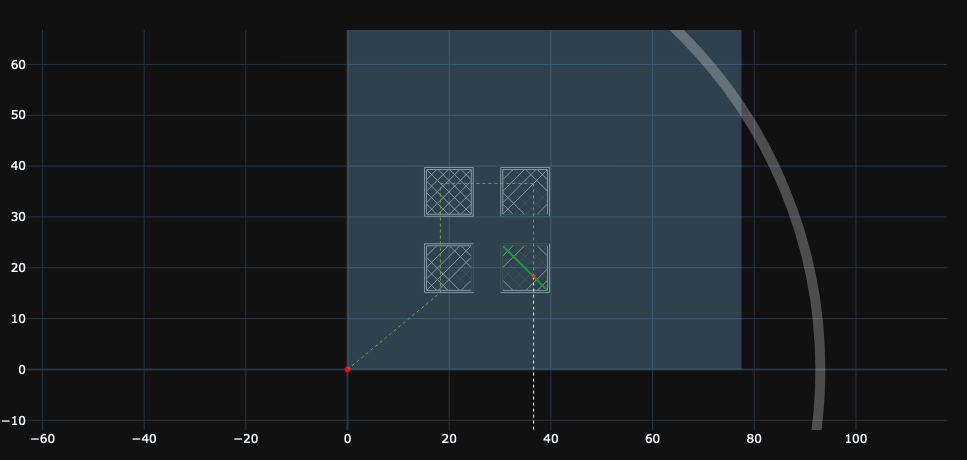

Step 11: Print 11 segments thread doesn't intersect


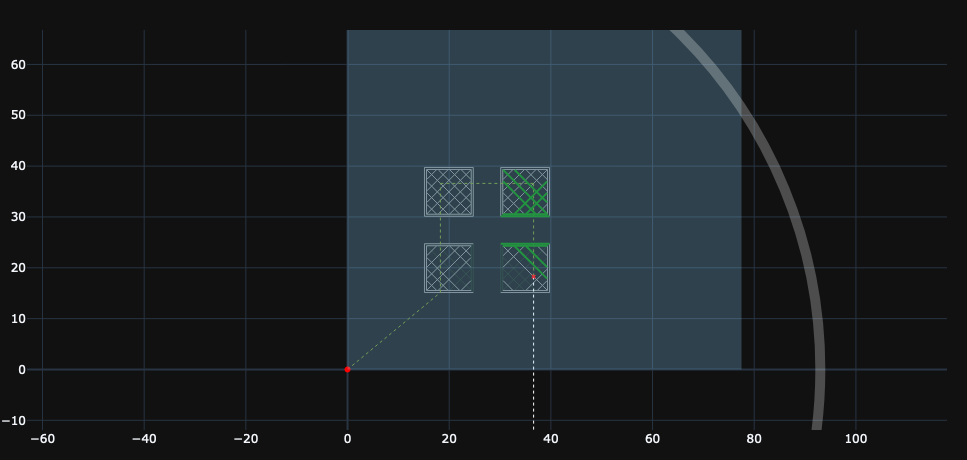

Step 12: Move thread to overlap anchor at { 21.60,  18.27,   3.40}


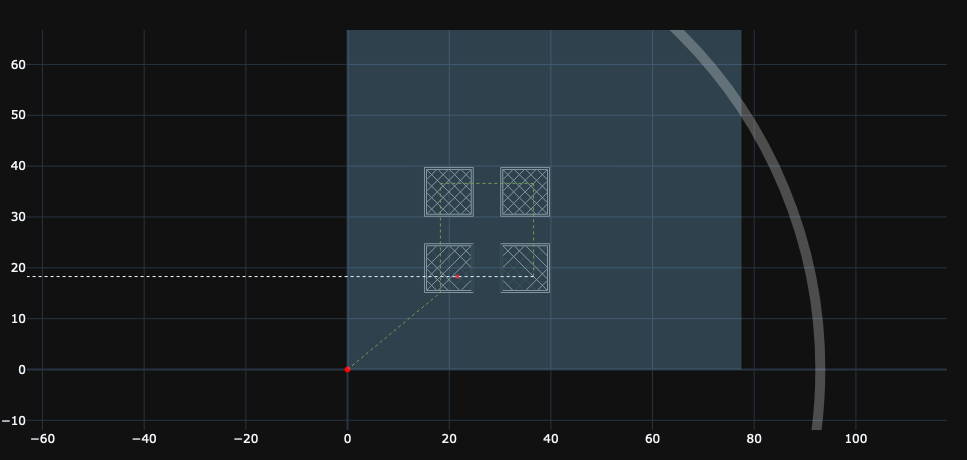

Step 13: Print 1 segment to fix anchor


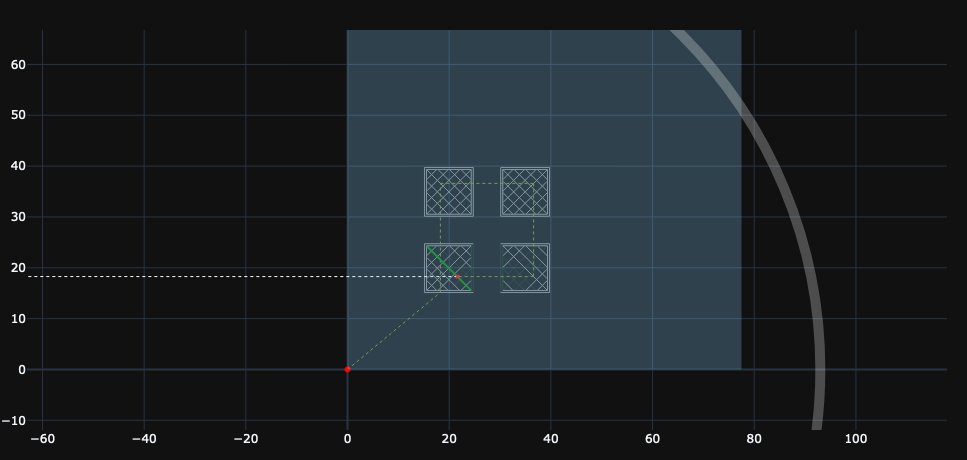

Step 14: Print 11 segments thread doesn't intersect


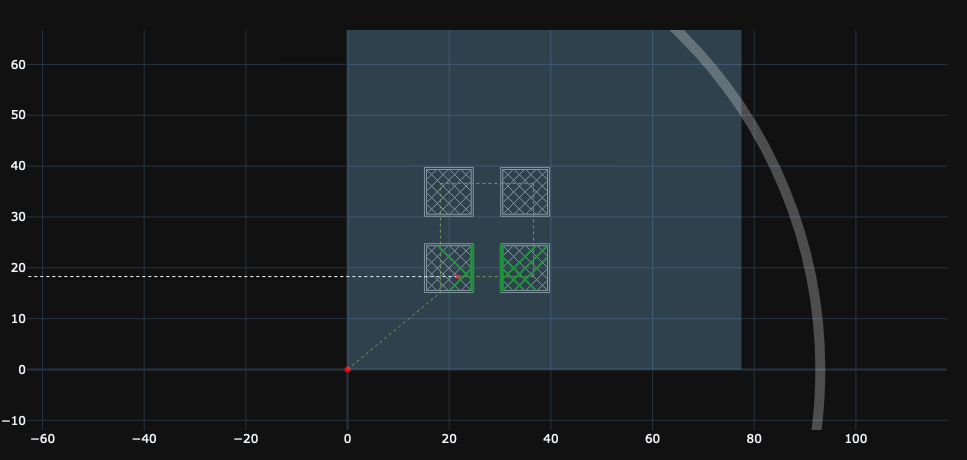

Finished routing this layer


In [72]:
l = 16
plotting.plot_steps(t.layer_steps[l], prev_layer=g.layers[l-1], prev_layer_only_outline=False)

In [73]:
t.layer_steps[16].gcode()

[;  Step 0 (378 lines): Print 37 segments thread doesn't intersect ---------------------------,
 T1 ;  Switch to ring extruder,
 M82 ;  Set relative extrusion mode,
 G1 E43.427 F8000 ;  Ring move CCW from 0.00° to 43.43°,
 G0 X15.536 Y15.534 ;  ---- Fake move from 4502,
 T1 ;  Switch to ring extruder,
 M82 ;  Set relative extrusion mode,
 G1 E33.087 F8000 ;  Ring move CCW from 43.43° to 76.51°,
 G1 X15.536 Y24.334 E420.28914 ; [4503],
 T1 ;  Switch to ring extruder,
 M82 ;  Set relative extrusion mode,
 G1 E19.814 F8000 ;  Ring move CCW from 76.51° to 96.33°,
 G0 X15.136 Y15.134 ;  ---- Skipped 4504–4508; fake move from 4508,
 T1 ;  Switch to ring extruder,
 M82 ;  Set relative extrusion mode,
 G1 E10.881 F8000 ;  Ring move CCW from 96.33° to 107.21°,
 G1 X15.136 Y24.734 E421.53972 ; [4509],
 T1 ;  Switch to ring extruder,
 M82 ;  Set relative extrusion mode,
 G1 E7.446 F8000 ;  Ring move CCW from 107.21° to 114.66°,
 G0 F9000 X15.806 Y15.804 ; [4514],
 T1 ;  Switch to ring extruder,
 

In [48]:
type(_)

list

In [33]:
t.layer_steps[16].printer.ring.initial_angle

168.6664315792073